In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from collections import Counter

In [2]:
data2=pd.read_csv('Google-Playstore-Full.csv',low_memory=False,error_bad_lines=False)

In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
App Name           267051 non-null object
Category           267051 non-null object
Rating             267052 non-null object
Reviews            267051 non-null object
Installs           267052 non-null object
Size               267052 non-null object
Price              267052 non-null object
Content Rating     267052 non-null object
Last Updated       267052 non-null object
Minimum Version    267051 non-null object
Latest Version     267049 non-null object
Unnamed: 11        18 non-null object
Unnamed: 12        3 non-null object
Unnamed: 13        2 non-null object
Unnamed: 14        1 non-null float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


In [4]:
data2.head()

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1207922,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
2,Peapod,SHOPPING,3.656329393,1967,"100,000+",1.4M,0,Everyone,"September 20, 2018",5.0 and up,2.2.0,NaN,NaN,NaN,NaN
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107232571,389154,"10,000,000+",16M,0,Everyone,"March 22, 2019",4.2 and up,4.18.2,NaN,NaN,NaN,NaN
4,My CookBook Pro (Ad Free),FOOD_AND_DRINK,4.647752285,2291,"10,000+",Varies with device,$5.99,Everyone,"April 1, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [5]:
data2.columns

Index(['App Name', 'Category', 'Rating', 'Reviews', 'Installs', 'Size',
       'Price', 'Content Rating', 'Last Updated', 'Minimum Version',
       'Latest Version', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [6]:
data2.rename(columns={'App Name':'app_name','Category':'category','Rating':'rating','Reviews':'reviews','Installs':'installs',
                    'Size':'size','Price':'price','Content Rating':'content_rating','Last Updated':'last_updated',
                    'Minimum Version':'minimum_version','Latest Version':'latest_version','Unnamed: 11':'unnamed1',
                    'Unnamed: 12':'unnamed2','Unnamed: 13':'unnamed3','Unnamed: 14':'unnamed4'},inplace=True)

In [7]:
data2.columns

Index(['app_name', 'category', 'rating', 'reviews', 'installs', 'size',
       'price', 'content_rating', 'last_updated', 'minimum_version',
       'latest_version', 'unnamed1', 'unnamed2', 'unnamed3', 'unnamed4'],
      dtype='object')

In [8]:
data2['unnamed4'].value_counts()

9.1    1
Name: unnamed4, dtype: int64

In [9]:
data2[data2["rating"]==' Economics']

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version,unnamed1,unnamed2,unnamed3,unnamed4
232811,Learn Accounts - Finance,Accounting,Economics,BOOKS_AND_REFERENCE,4.823529243,17,"1,000+",17M,0,Everyone,"October 22, 2018",4.0.3 and up,1,NaN,NaN


In [10]:
data2.drop([6941,13504,23457,48438,32229,113151,125479,125480,180371,165230,168914,177165,193869,257773,190759
           ,194165,232811],inplace=True)

In [11]:
data2["rating"]=data2["rating"].astype({"rating":float})

In [12]:
data2[data2['rating']>5.0]

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version,unnamed1,unnamed2,unnamed3,unnamed4
99584,???? ????? 5,6,7.0,8,Xmax X,MUSIC_AND_AUDIO,4.468125343,3702,"500,000+",21M,0,Everyone,"February 14, 2019",4.4 and up,9.1


In [13]:
data2.drop(99584,inplace=True)

In [14]:
data2[data2.index==[267033]]

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version,unnamed1,unnamed2,unnamed3,unnamed4
267033,Bangla Alphabets (????? ????????),EDUCATION,3.545455,11,"1,000+",21M,0,Everyone,"October 5, 2018",4.1 and up,1.0.0.3,NaN,NaN,NaN,NaN


In [15]:
data2["reviews"]=data2["reviews"].astype({"reviews":float})

In [16]:
data2["installs"] = [x.replace(',','') for x in data2["installs"]]

In [17]:
data2["installs"] = [x.strip('+') for x in data2["installs"]]

In [18]:
data2["installs"]=data2["installs"].astype({"installs":float})

In [19]:
data2["size"] = [x.replace('Varies with device','NaN') for x in data2["size"]]

In [20]:
data2["size"] = [x.replace('M','000000') for x in data2["size"]]

In [21]:
data2["size"] = [x.replace('k','000') for x in data2["size"]]

In [22]:
data2["size"] = [x.replace(',','') for x in data2["size"]]

In [23]:
data2["size"]=data2["size"].astype({"size":float})

In [24]:
data2["price"] = [x.strip('$') for x in data2["price"]]

In [25]:
data2["price"]=data2["price"].astype({"price":float})

In [26]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267034 entries, 0 to 267051
Data columns (total 15 columns):
app_name           267033 non-null object
category           267034 non-null object
rating             267034 non-null float64
reviews            267034 non-null float64
installs           267034 non-null float64
size               255308 non-null float64
price              267034 non-null float64
content_rating     267034 non-null object
last_updated       267034 non-null object
minimum_version    267033 non-null object
latest_version     267031 non-null object
unnamed1           0 non-null object
unnamed2           0 non-null object
unnamed3           0 non-null object
unnamed4           0 non-null float64
dtypes: float64(6), object(9)
memory usage: 32.6+ MB


In [27]:
def cost(price):
    if price>0.0:
        return 1
    else:
        return 0

In [28]:
data2["price"]=data2["price"].apply(cost)

In [29]:
data2['price'].value_counts()

0    255428
1     11606
Name: price, dtype: int64

In [30]:
data2['last_updated']=pd.to_datetime(data2['last_updated'].astype(str), format='%B %d, %Y')

In [31]:
data2['last_updated']=data2['last_updated'].astype({'last_updated':str})

In [32]:
data2[data2['last_updated']=='19']

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version,unnamed1,unnamed2,unnamed3,unnamed4


In [33]:
data2['latest_version'].value_counts()

1                     33002
1.1                   11714
Varies with device     8553
1.2                    8205
2                      7126
1.3                    5922
1.4                    4400
1.0.0                  4146
1.0.1                  4073
3                      3815
1.5                    3671
1.0.2                  3118
1.6                    2670
2.1                    2517
1.0.3                  2365
4                      2114
1.7                    1977
1.0.4                  1862
1.1.0                  1757
1.0.5                  1682
1.1.1                  1652
2.2                    1640
1.8                    1635
1.0.6                  1416
5                      1403
1.9                    1390
2.3                    1280
2.0.0                  1237
1.0.7                  1127
1.1.2                  1113
                      ...  
2.006.19                  1
8.0d                      1
1.311.1.28                1
0.72b3                    1
10.22               

In [34]:
data2[data2['latest_version']=='1.0.0']

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version,unnamed1,unnamed2,unnamed3,unnamed4
102,Archer Fighter: Stickman Fight,GAME_ACTION,4.301370,438.0,100000.0,38000000.0,0,Teen,2019-02-20,4.1 and up,1.0.0,NaN,NaN,NaN,NaN
244,Tiffany Alvord Dream World,GAME_MUSIC,4.369269,59672.0,1000000.0,46000000.0,0,Everyone,2015-01-21,2.3 and up,1.0.0,NaN,NaN,NaN,NaN
566,Oddbods Turbo Run,GAME_ARCADE,4.528426,6086.0,1000000.0,89000000.0,0,Everyone,2019-01-31,4.1 and up,1.0.0,NaN,NaN,NaN,NaN
1151,Fantasy Mosaics 33: Inventor's Workshop,GAME_PUZZLE,5.000000,1.0,100.0,98000000.0,1,Everyone,2019-02-24,4.0 and up,1.0.0,NaN,NaN,NaN,NaN
1455,Sweet Face Camera,BEAUTY,3.704568,3984.0,1000000.0,22000000.0,0,Everyone,2018-11-13,4.0 and up,1.0.0,NaN,NaN,NaN,NaN
1755,Blood Pressure Checker Diary : BP Info :BP Tra...,MEDICAL,4.040000,75.0,10000.0,2.1,0,Everyone,2019-02-18,4.0.3 and up,1.0.0,NaN,NaN,NaN,NaN
1858,Occidental Heroes,GAME_ROLE_PLAYING,4.373347,8922.0,500000.0,19000000.0,0,Everyone 10+,2019-02-15,4.0 and up,1.0.0,NaN,NaN,NaN,NaN
2209,My Little Pony Celebration,GAME_SIMULATION,4.329068,66737.0,5000000.0,17000000.0,0,Everyone,2016-07-22,2.3 and up,1.0.0,NaN,NaN,NaN,NaN
2923,GuessUp Kids - Party Charades,GAME_WORD,5.000000,15.0,100.0,29000000.0,1,Everyone,2019-02-15,4.3 and up,1.0.0,NaN,NaN,NaN,NaN
3338,Test Application - Daily Sub02,EVENTS,3.666667,3.0,100.0,53000.0,0,Everyone,2016-02-09,4.0 and up,1.0.0,NaN,NaN,NaN,NaN


In [35]:
data2.groupby('minimum_version')['minimum_version'].count().sort_values(ascending=False)

minimum_version
4.1 and up            70848
4.0.3 and up          49324
4.0 and up            37837
4.4 and up            28250
5.0 and up            17413
4.2 and up            13629
2.3 and up            11895
Varies with device     8029
4.3 and up             5267
2.2 and up             4873
2.3.3 and up           4797
3.0 and up             4312
2.1 and up             2378
6.0 and up             2143
1.6 and up             1650
5.1 and up             1001
3.2 and up              616
7.0 and up              550
4.4W and up             456
2.0 and up              423
1.5 and up              409
3.1 and up              350
8.0 and up              223
1.0 and up               95
2.0.1 and up             91
7.1 and up               46
1.1 and up               15
4.1 - 7.1.1              12
4.1 - 8.0                11
4.0.3 - 8.0               5
                      ...  
1.6 - 4.0.4               1
2.3 - 4.4W                1
1.5 - 4.0.2               1
2.3 - 7.1.1               1
4.0 

In [36]:
data2.groupby('category')['category'].count().sort_values(ascending=False)

category
EDUCATION              33394
TOOLS                  21592
BOOKS_AND_REFERENCE    21377
ENTERTAINMENT          20604
MUSIC_AND_AUDIO        17876
LIFESTYLE              15034
PERSONALIZATION        10544
FINANCE                10342
BUSINESS               10230
PRODUCTIVITY            9142
NEWS_AND_MAGAZINES      8030
HEALTH_AND_FITNESS      7537
PHOTOGRAPHY             7240
TRAVEL_AND_LOCAL        6649
SPORTS                  5585
COMMUNICATION           5486
SHOPPING                5337
SOCIAL                  4744
MAPS_AND_NAVIGATION     4094
MEDICAL                 3736
GAME_PUZZLE             3620
FOOD_AND_DRINK          3170
VIDEO_PLAYERS           2717
GAME_CASUAL             2426
GAME_ARCADE             2343
AUTO_AND_VEHICLES       2104
GAME_EDUCATIONAL        2007
ART_AND_DESIGN          1758
WEATHER                 1643
GAME_SIMULATION         1607
GAME_ACTION             1482
GAME_CARD               1183
GAME_ADVENTURE          1055
GAME_ROLE_PLAYING       1035
GAME_

In [43]:
[data2.corr()['rating']]

[rating      1.000000
 reviews     0.008475
 installs    0.002714
 size        0.005290
 price       0.015207
 unnamed4         NaN
 Name: rating, dtype: float64]

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.svm import SVC

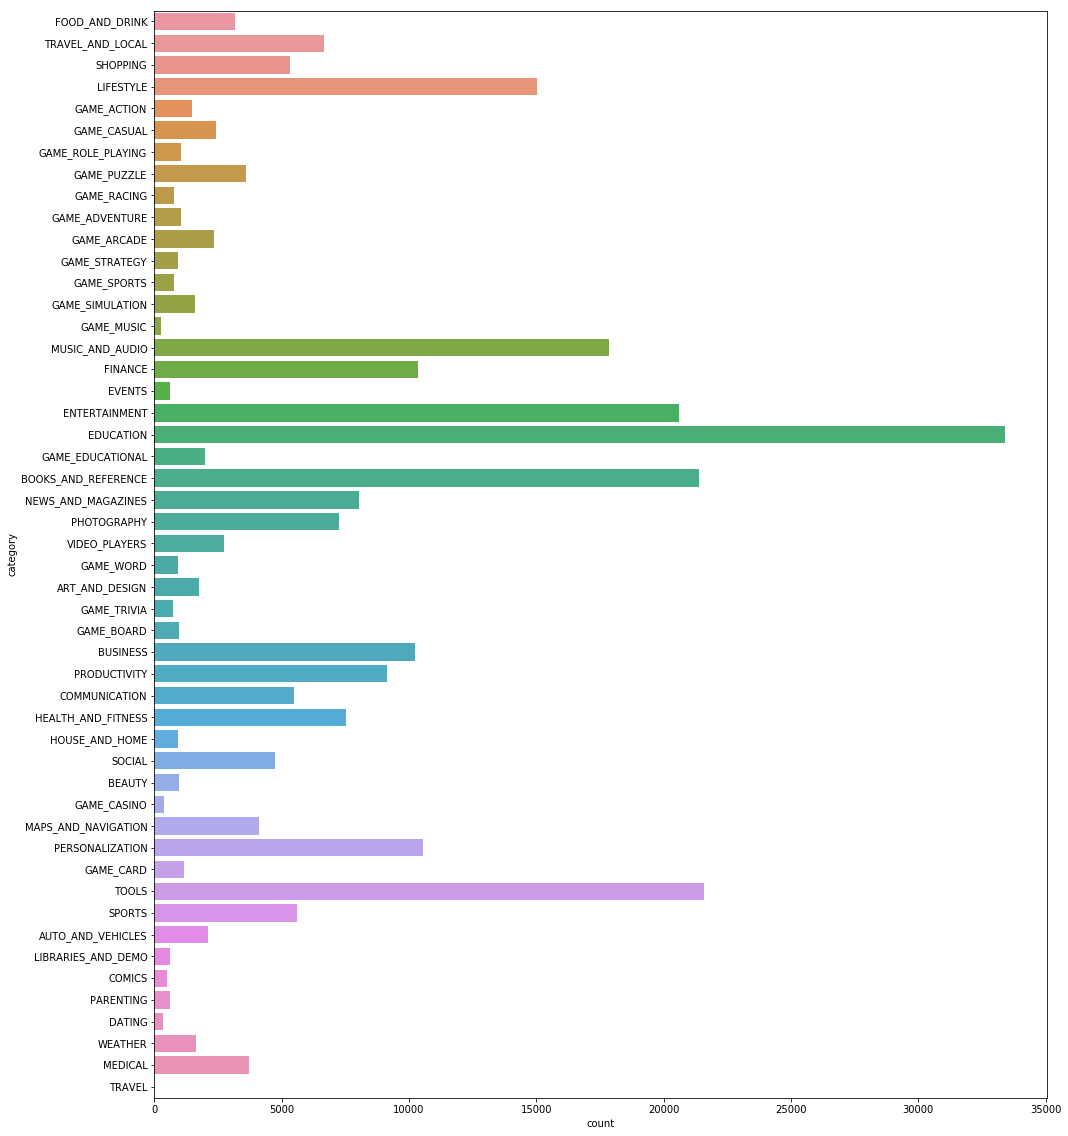

In [45]:
plt.figure(figsize=(16,20))
sns.countplot(y='category',data=data2)
plt.show()

In [46]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267034 entries, 0 to 267051
Data columns (total 15 columns):
app_name           267033 non-null object
category           267034 non-null object
rating             267034 non-null float64
reviews            267034 non-null float64
installs           267034 non-null float64
size               255308 non-null float64
price              267034 non-null int64
content_rating     267034 non-null object
last_updated       267034 non-null object
minimum_version    267033 non-null object
latest_version     267031 non-null object
unnamed1           0 non-null object
unnamed2           0 non-null object
unnamed3           0 non-null object
unnamed4           0 non-null float64
dtypes: float64(5), int64(1), object(9)
memory usage: 42.6+ MB


In [47]:
dt_ctg=data2.groupby('category',as_index=False)['rating'].mean()
dt_ctg.head()

,category,rating
0,ART_AND_DESIGN,4.229019
1,AUTO_AND_VEHICLES,4.126978
2,BEAUTY,4.296484
3,BOOKS_AND_REFERENCE,4.475828
4,BUSINESS,4.142819


In [48]:
dt_rvws=data2.groupby('reviews',as_index=False)['rating'].mean()
dt_rvws.head(10)

,reviews,rating
0,1.0,4.411388
1,2.0,4.343754
2,3.0,4.280993
3,4.0,4.310032
4,5.0,4.283669
5,6.0,4.284290
6,7.0,4.282838
7,8.0,4.270578
8,9.0,4.276315
9,10.0,4.265822


In [49]:
dt_sz=data2.groupby('size',as_index=False)['rating'].mean()
dt_sz.head(10)

,size,rating
0,1.0,4.235779
1,1.1,4.181199
2,1.2,4.199767
3,1.3,4.180118
4,1.4,4.216732
5,1.5,4.220023
6,1.6,4.244187
7,1.7,4.241015
8,1.8,4.206780
9,1.9,4.257990


In [50]:
dt_in=data2.groupby('installs',as_index=False)['rating'].mean()
dt_in.head(6)

,installs,rating
0,0.0,4.334034
1,1.0,4.824496
2,5.0,4.812350
3,10.0,4.649256
4,50.0,4.537872
5,100.0,4.401526


In [51]:
dt_prc=data2.groupby('price',as_index=False)['rating'].mean()
dt_prc.head(10)

,price,rating
0,0,4.267476
1,1,4.311198


In [52]:
dt_cr=data2.groupby('content_rating',as_index=False)['rating'].mean()
dt_cr.head(10)

,content_rating,rating
0,Adults only 18+,4.141135
1,Everyone,4.264807
2,Everyone 10+,4.291600
3,Mature 17+,4.241863
4,Teen,4.333072
5,Unrated,4.221259


In [53]:
dt_av=data2.groupby('minimum_version',as_index=False)['rating'].mean()
dt_av.head()

,minimum_version,rating
0,1.0 - 6.0,4.111111
1,1.0 and up,4.262285
2,1.1 and up,4.183094
3,1.5 - 4.0.2,4.426829
4,1.5 and up,4.117667


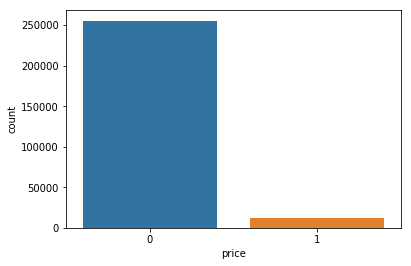

In [54]:
sns.countplot(x='price',data=data2)

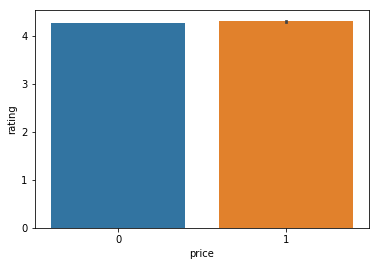

In [55]:
sns.barplot(x='price', y='rating', data=data2)

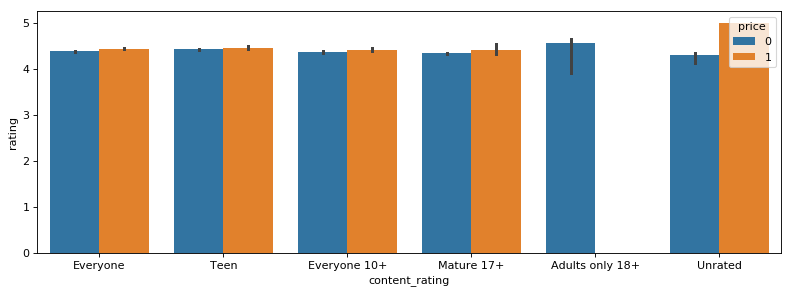

In [56]:
plt.figure(num=None, figsize=(12, 4), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='content_rating', y='rating', hue="price", data=data2, estimator=np.median)
plt.show()

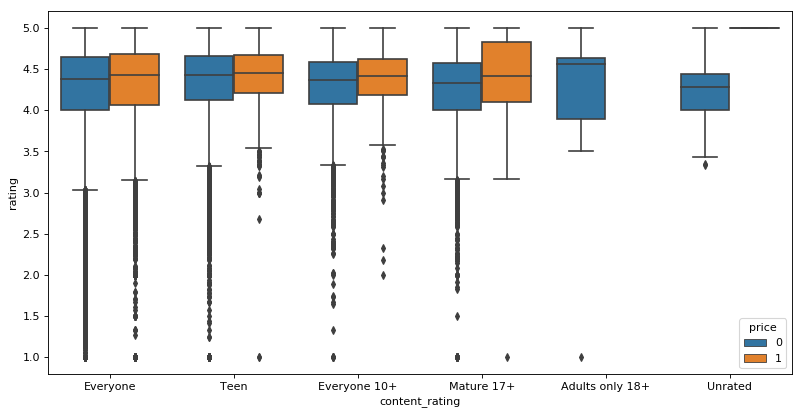

In [60]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x='content_rating', y='rating', hue="price", data=data2)
plt.show()

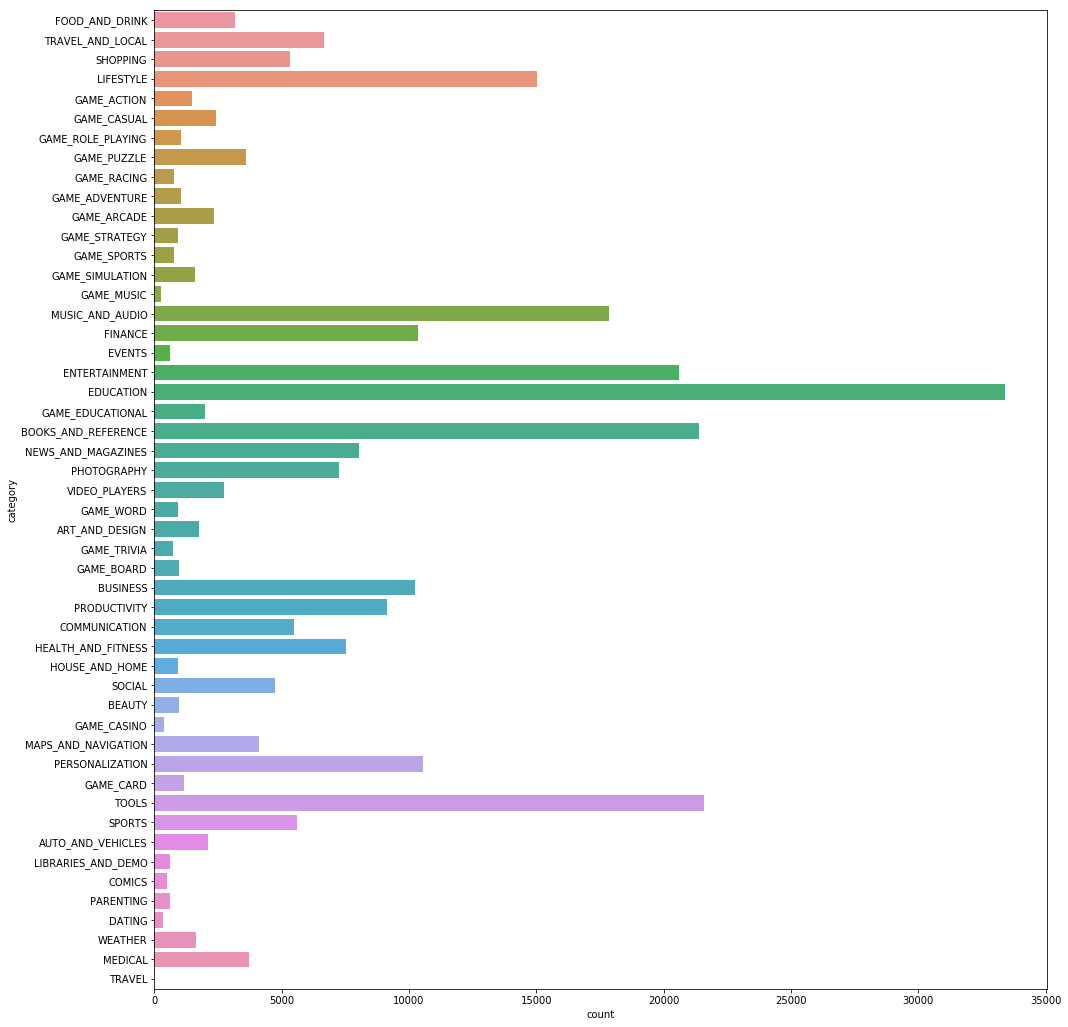

In [61]:
plt.figure(figsize=(16,18))
sns.countplot(y='category',data=data2)
plt.show()

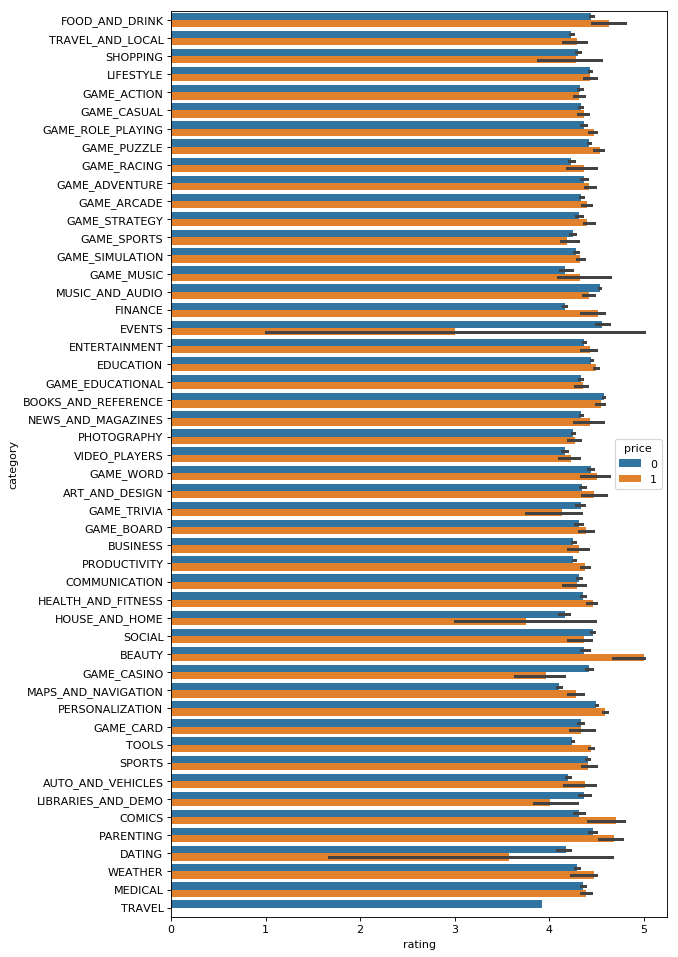

In [62]:
plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
sns.barplot(y='category', x='rating', hue="price", data=data2, estimator=np.median)
plt.show()

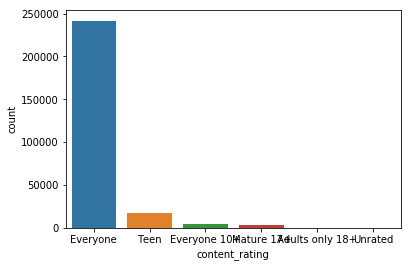

In [63]:
sns.countplot(x='content_rating',data=data2)

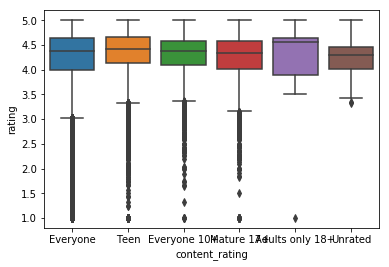

In [64]:
sns.boxplot(x='content_rating', y='rating', data=data2)

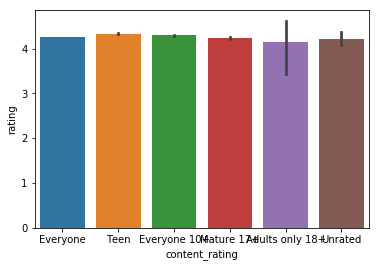

In [65]:
sns.barplot(x='content_rating', y='rating', data=data2)

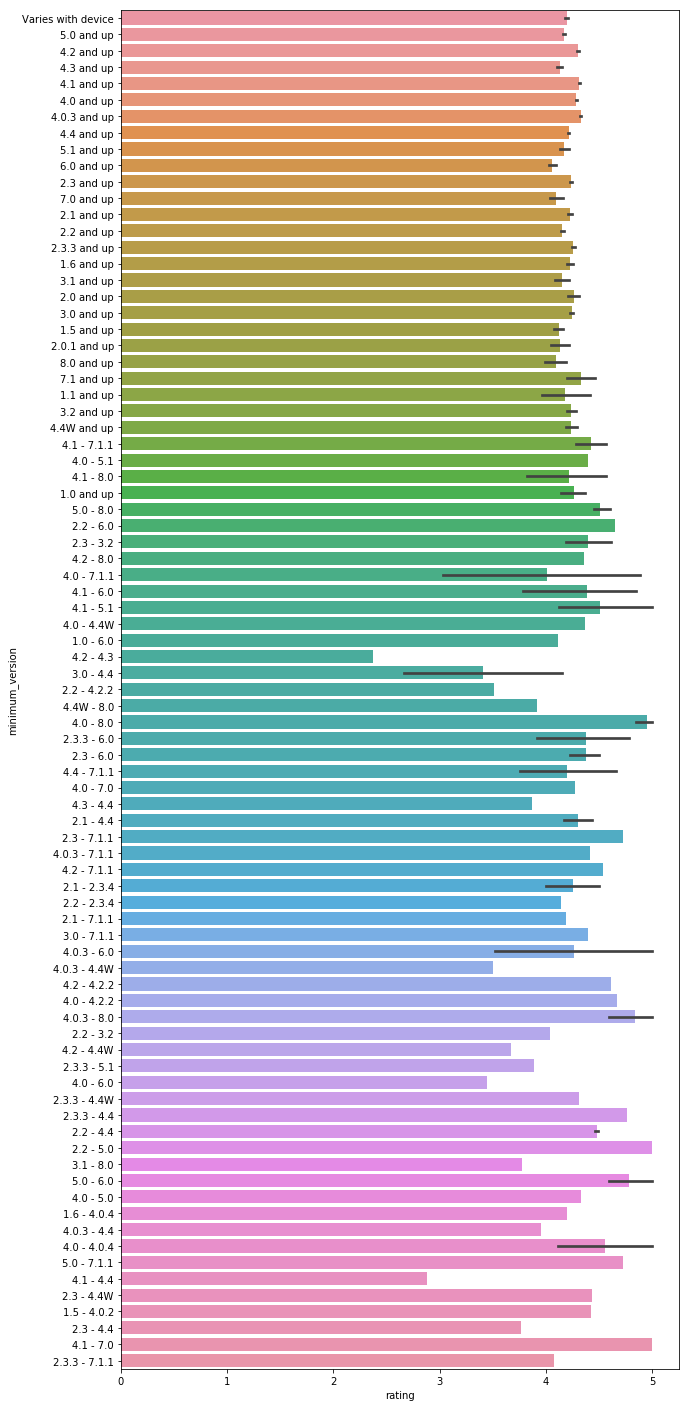

In [66]:
plt.figure(figsize=(10, 25))
sns.barplot(y='minimum_version', x='rating', data=data2)
plt.show()

<Figure size 432x288 with 0 Axes>

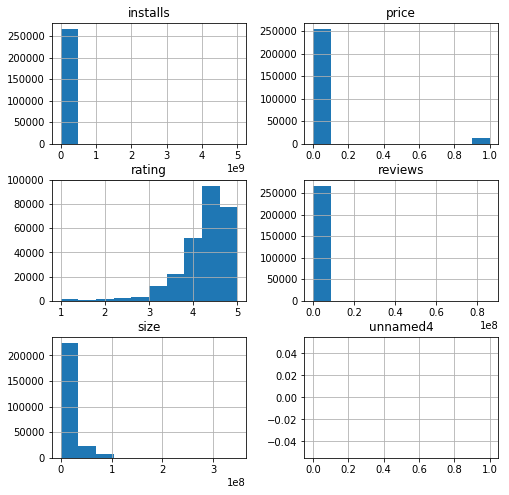

<Figure size 432x288 with 0 Axes>

In [67]:
data2.hist(figsize=(8,8))
plt.figure()

In [68]:
data2.isnull().sum().sum()

1079867

In [69]:
total=data2.isnull().sum()
percent = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
app_name,1,0.000004
category,0,0.000000
content_rating,0,0.000000
installs,0,0.000000
last_updated,0,0.000000
latest_version,3,0.000011
minimum_version,1,0.000004
price,0,0.000000
rating,0,0.000000
reviews,0,0.000000


In [70]:
data2.dropna(axis=1,how='all',inplace=True)

In [71]:
data2.dropna(inplace=True)

In [72]:
data2

,app_name,category,rating,reviews,installs,size,price,content_rating,last_updated,minimum_version,latest_version
2,Peapod,SHOPPING,3.656329,1967.0,100000.0,1.4,0,Everyone,2018-09-20,5.0 and up,2.2.0
3,foodpanda - Local Food Delivery,FOOD_AND_DRINK,4.107233,389154.0,10000000.0,16000000.0,0,Everyone,2019-03-22,4.2 and up,4.18.2
5,Safeway Online Shopping,FOOD_AND_DRINK,3.825322,2559.0,100000.0,23000000.0,0,Everyone,2019-03-29,5.0 and up,7.6.0
8,Fast Food Locator | Worldwide Fast Food Finder,TRAVEL_AND_LOCAL,3.811765,85.0,10000.0,4.1,0,Everyone,2019-02-10,4.3 and up,2.4
12,FreshDirect,LIFESTYLE,3.213528,754.0,100000.0,39000000.0,0,Everyone,2019-03-27,5.0 and up,6.7
13,Easy Healthy Recipes for free app,FOOD_AND_DRINK,4.160279,287.0,100000.0,8.1,0,Everyone,2019-03-07,4.0 and up,25.5.0
16,Chick-fil-A,FOOD_AND_DRINK,4.374691,52526.0,5000000.0,19000000.0,0,Everyone,2019-03-21,5.0 and up,6.1.0
18,Seamless: Restaurant Takeout & Food Delivery App,FOOD_AND_DRINK,4.517922,41597.0,1000000.0,30000000.0,0,Everyone,2019-03-28,5.0 and up,7.3
19,Food Planner,FOOD_AND_DRINK,3.909142,10764.0,1000000.0,11000000.0,0,Everyone,2019-04-01,4.0.3 and up,5.1.3.0-google
20,Cookpad - Create your own Recipes,FOOD_AND_DRINK,4.514294,164089.0,10000000.0,11000000.0,0,Everyone,2019-04-02,4.4 and up,2.106.4.0-android


In [73]:
catgry=pd.get_dummies(data2['category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data2['price'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data2['content_rating'],prefix='cr',drop_first=True)
frames=[data2,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['category','installs','price','content_rating'],axis=1,inplace=True)

In [74]:
data.drop(['app_name','size','last_updated','minimum_version','latest_version'],axis=1,inplace=True)

In [75]:
data.head(5)

,rating,reviews,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,catg_DATING,catg_EDUCATION,...,catg_TRAVEL,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_1,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
2,3.656329,1967.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.107233,389154.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5,3.825322,2559.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8,3.811765,85.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
12,3.213528,754.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
X=data.drop('rating',axis=1)
y=data['rating'].values
y=y.astype('int')

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [79]:
X_train

array([[ 1.0726935 , -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342],
       [-0.04222158, -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342],
       [-0.04299064, -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342],
       ...,
       [-0.04312107, -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342],
       [-0.04071943, -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342],
       [-0.04320652, -0.08891348, -0.06139614, ..., -0.11498125,
        -0.26169594, -0.01128342]])

# Logistic regression

In [80]:
lr_c=LogisticRegression(random_state=4)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Sudhanshu_Shah\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression_accuracy: 0.6843579248350012


In [86]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [90]:
print (color.BOLD + 'ACCURACY USING LOGISTIC REGRESSION IS: 0.6843579248350012' + color.END)

ACCURACY USING LOGISTIC REGRESSION IS: 0.6843579248350012
